# Finance Dataset
In this project we will focus on the exploratory data analysis of stock prices.
We will get the data using pandas datareader and will get the stock information for the following banks:
Bank of America, CitiGroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, Wells Fargo from Jan 1st 2006 to Jan 1st 2016 for each of these banks.


### The Imports

In [2]:
import pandas as pd
from pandas_datareader import data, wb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import cufflinks as cf

**Use datetime to set start and end datetime objects and then use datareader to grab info on the stock.**

In [3]:
start = dt.datetime(2011,1,1)
end = dt.datetime(2021,1,1)
BAC = data.DataReader('BAC','yahoo',start,end)
C = data.DataReader('C', 'yahoo', start, end)
GS = data.DataReader('GS', 'yahoo', start, end)
JPM = data.DataReader('JPM', 'yahoo', start, end)
MS = data.DataReader('MS', 'yahoo', start, end)
WFC = data.DataReader('WFC', 'yahoo', start, end)

**Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [4]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

**Concatenate the bank dataframes together to a single data frame called bank_stocks along axis 1**

In [5]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],keys=tickers,axis=1)


**Set the column name levels**

In [6]:
bank_stocks.columns.names=['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [7]:
bank_stocks.head()

Bank Ticker    BAC                                                       C  \
Stock Info    High    Low   Open  Close       Volume  Adj Close       High   
Date                                                                         
2010-12-31   13.38  13.22  13.23  13.34   63036100.0  11.543572  47.599998   
2011-01-03   14.23  13.80  13.85  14.19  354322300.0  12.279108  49.000000   
2011-01-04   14.25  14.02  14.23  14.24  218978200.0  12.322374  49.400002   
2011-01-05   14.60  14.15  14.19  14.50  246151200.0  12.547360  50.000000   
2011-01-06   14.69  14.34  14.54  14.44  241658500.0  12.495440  50.500000   

Bank Ticker                                   ...         MS             \
Stock Info         Low       Open      Close  ...       Open      Close   
Date                                          ...                         
2010-12-31   47.200001  47.500000  47.299999  ...  27.219999  27.209999   
2011-01-03   47.799999  47.799999  49.000000  ...  27.629999  28.230000   
2011-01-04   48.299999  49.099998  49.000000  ...  28.459999  28.469999   
2011-01-05   48.799999  48.799999  49.700001  ...  28.360001  28.830000   
2011-01-06   49.299999  50.000000  49.500000  ...  28.850000  28.799999   

Bank Ticker                               WFC                        \
Stock Info       Volume  Adj Close       High        Low       Open   
Date                                                                  
2010-12-31    6643200.0  22.367479  31.030001  30.660000  30.719999   
2011-01-03   21176700.0  23.205948  31.660000  31.160000  31.299999   
2011-01-04   12859900.0  23.403231  31.940001  31.490000  31.650000   
2011-01-05   15101100.0  23.699160  32.500000  31.400000  31.410000   
2011-01-06   13200900.0  23.674500  32.470001  32.119999  32.150002   

Bank Ticker                                    
Stock Info       Close      Volume  Adj Close  
Date                                           
2010-12-31   30.990000  12108400.0  22.880640  
2011-01-03   31.580000  34397100.0  23.316250  
2011-01-04   31.650000  30341100.0  23.367937  
2011-01-05   32.369999  43245600.0  23.899523  
2011-01-06   32.150002  32500000.0  23.737097  

[5 rows x 36 columns]

### EDA
**Let's explore the data a bit!**

**What is the max Close price for each bank's stock throughout the time period?**

In [8]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     35.639999
C       81.910004
GS     273.380005
JPM    141.089996
MS      68.529999
WFC     65.930000
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [9]:
returns = pd.DataFrame()

**Use pandas pct_change() method on the Close column to create a column representing this return value**

In [10]:
for tick in tickers:
    returns[tick + " Returns"] = bank_stocks[tick]['Close'].pct_change()
returns.head()

BAC Returns  C Returns  GS Returns  JPM Returns  MS Returns  \
Date                                                                      
2010-12-31          NaN        NaN         NaN          NaN         NaN   
2011-01-03     0.063718   0.035941    0.029079     0.027346    0.037486   
2011-01-04     0.003524   0.000000    0.000173     0.013309    0.008502   
2011-01-05     0.018258   0.014286    0.005315     0.012228    0.012645   
2011-01-06    -0.004138  -0.004024   -0.010287    -0.004922   -0.001041   

            WFC Returns  
Date                     
2010-12-31          NaN  
2011-01-03     0.019038  
2011-01-04     0.002217  
2011-01-05     0.022749  
2011-01-06    -0.006796

**Create a pairplot using seaborn of the returns dataframe**


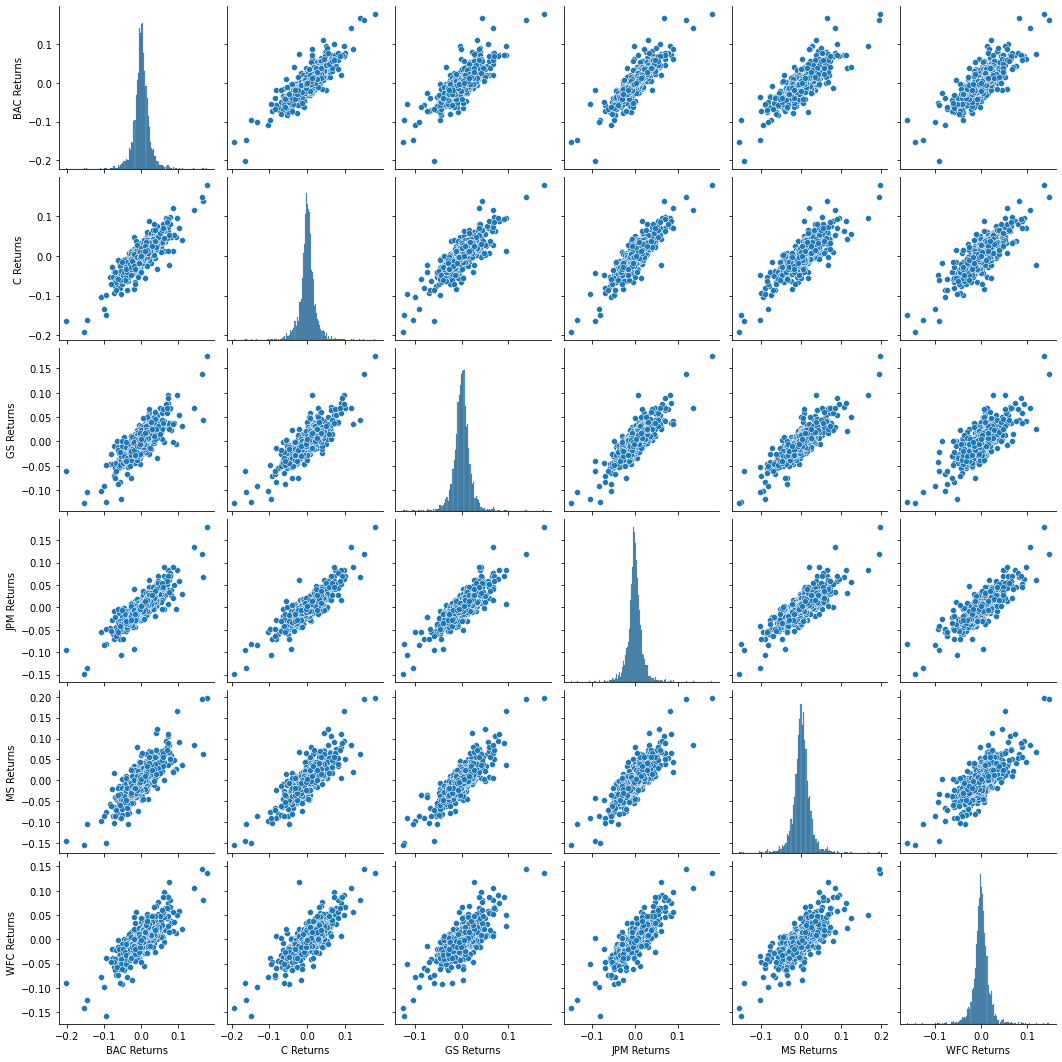

In [11]:
sns.pairplot(returns[1:])

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns.**

In [12]:
returns.head(2)

BAC Returns  C Returns  GS Returns  JPM Returns  MS Returns  \
Date                                                                      
2010-12-31          NaN        NaN         NaN          NaN         NaN   
2011-01-03     0.063718   0.035941    0.029079     0.027346    0.037486   

            WFC Returns  
Date                     
2010-12-31          NaN  
2011-01-03     0.019038

In [13]:
returns.idxmin()#min

BAC Returns   2011-08-08
C Returns     2020-03-16
GS Returns    2020-03-16
JPM Returns   2020-03-16
MS Returns    2020-03-16
WFC Returns   2020-03-12
dtype: datetime64[ns]

In [14]:
returns.idxmax()#max

BAC Returns   2020-03-13
C Returns     2020-03-13
GS Returns    2020-03-13
JPM Returns   2020-03-13
MS Returns    2020-03-13
WFC Returns   2020-03-24
dtype: datetime64[ns]

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period?**

In [15]:
returns.std()

BAC Returns    0.022414
C Returns      0.022463
GS Returns     0.018464
JPM Returns    0.018150
MS Returns     0.022777
WFC Returns    0.018275
dtype: float64

**Which would you classify as the riskiest for the year 2015 in terms of standard deviation?**

In [16]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

**Create a displot using seaborn of the 2015 returns for Morgan Stanley**

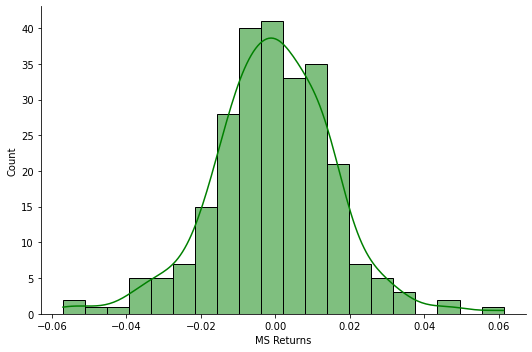

In [17]:
sns.displot(x='MS Returns',data=returns.loc['2015-01-01':'2015-12-31'],aspect=1.5,kde=True,color='g',bins=20)

**Create a distplot using seaborn of the 2011 returns for CitiGroup**

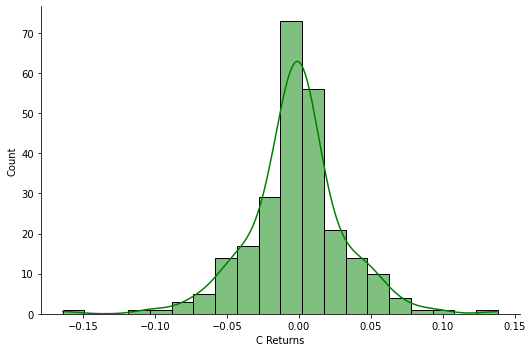

In [18]:
sns.displot(x='C Returns',data=returns.loc['2011-01-01':'2011-12-31'],aspect=1.5,kde=True,color='g',bins=20)

**Create a line plot showing Close price for each bank for the entire index of time.**

In [56]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()#Method 1

<AxesSubplot:xlabel='Date'>

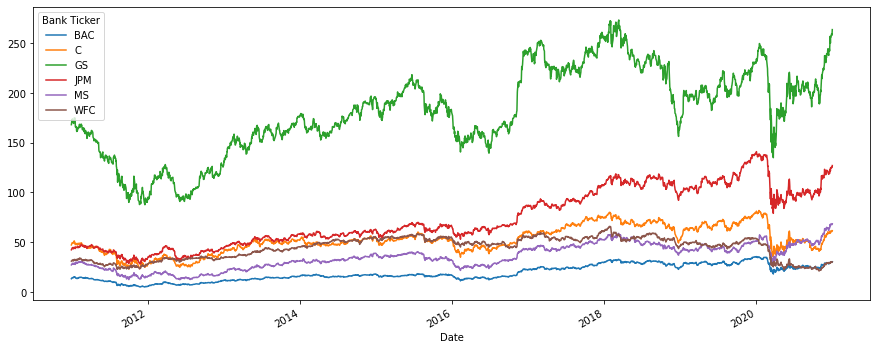

In [55]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(figsize=(15,6))#Method 2

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2016**

<AxesSubplot:xlabel='Date'>

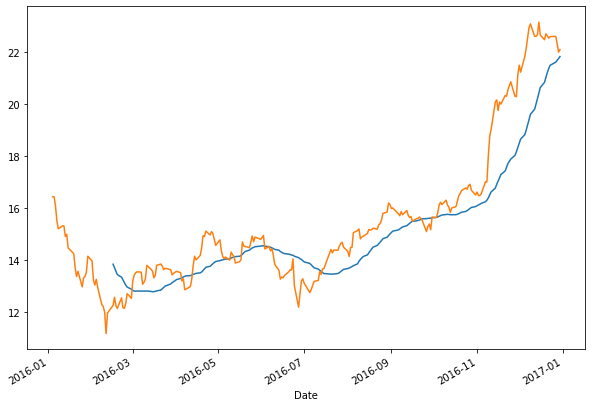

In [31]:
BAC['Close'].loc['2016-01-01':'2016-12-31'].rolling(window=30).mean().plot(label='30 day rolling average',figsize=(10,7))
BAC['Close'].loc['2016-01-01':'2016-12-31'].plot(label='BAC Close')

**Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot:xlabel='Bank Ticker', ylabel='Bank Ticker'>

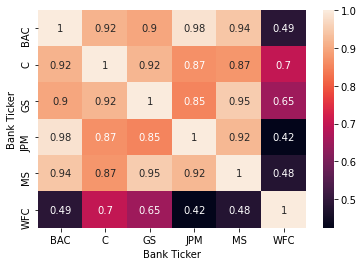

In [38]:
sns.heatmap(bank_stocks.xs(level='Stock Info',key='Close',axis=1).corr(),annot=True)


**Use seaborn's clustermap to cluster the correlations together:**

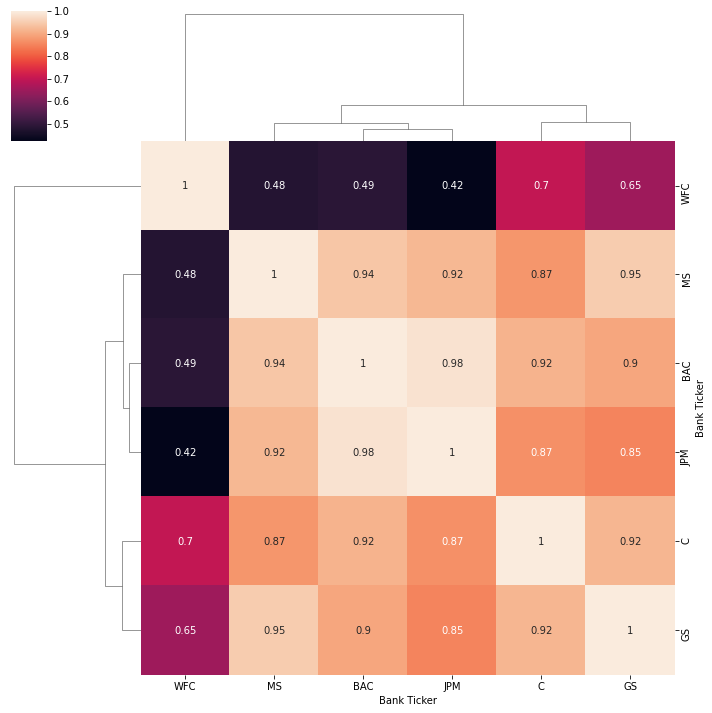

In [40]:
sns.clustermap(bank_stocks.xs(level='Stock Info',axis=1,key='Close').corr(),annot=True)

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**


In [49]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [50]:
MS.loc['2015-01-01':'2016-01-01'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [51]:
BAC.loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')